### Name: Sina Namazi
### StudentId: 400110154

# Librarires

In [1]:
import numpy as np
import random
np.random.seed(42)

from sklearn.datasets import fetch_california_housing

# Load Dataset

In [2]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [3]:
#TODO
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def cluster(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        self.centroids = self._init_centroids()
        for _ in range(self.max_iter):
            self.labels = self._assign_labels()
            new_centroids = self._update_centroids()
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        return self.labels, self.centroids
    
    def _init_centroids(self):
        # set seed
        return self.X[np.random.choice(self.n_samples, self.n_clusters, replace=False)]
    
    def _assign_labels(self):
        dists = np.linalg.norm(self.X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(dists, axis=1)
    
    def _update_centroids(self):
        new_centroids = np.zeros((self.n_clusters, self.n_features))
        for i in range(self.n_clusters):
            new_centroids[i] = np.mean(self.X[self.labels == i], axis=0)
        return new_centroids
    
    def WCSS(self):
        wcss = 0
        for i in range(self.n_clusters):
            cluster_points = self.X[self.labels == i]
            centroid = self.centroids[i]
            wcss += np.sum((cluster_points - centroid) ** 2)
        return wcss

# Use elbow method and silhouette method to choose optimal cluster numbers

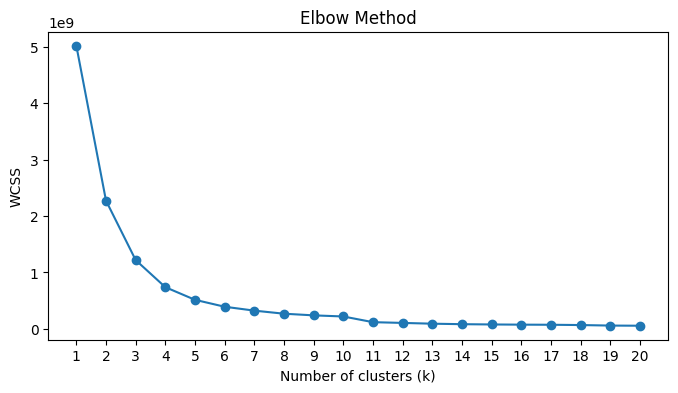

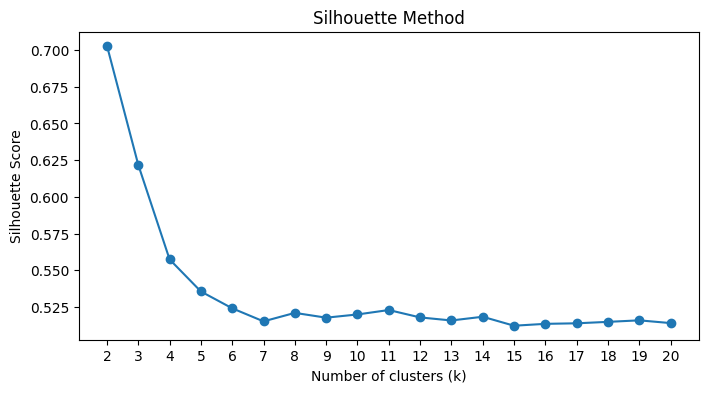

In [4]:
#TODO
import matplotlib.pyplot as plt

def silhouette_score(X, labels):
    n = len(X)
    unique_labels = np.unique(labels)
    silhouette_scores = np.zeros(n)
    distances = np.linalg.norm(X[:, np.newaxis] - X, axis=2)
    
    for i in range(n):
        same_cluster_mask = (labels == labels[i])
        same_cluster = X[same_cluster_mask]
        other_cluster_mask = (labels != labels[i])
        
        if np.sum(same_cluster_mask) > 1:
            a = np.mean(distances[i, same_cluster_mask][distances[i, same_cluster_mask] != 0])
        else:
            a = 0
        
        b = np.inf
        for label in unique_labels:
            if label != labels[i]:
                other_cluster_mask = (labels == label)
                if np.sum(other_cluster_mask) > 0:
                    b = min(b, np.mean(distances[i, other_cluster_mask]))
        
        silhouette_scores[i] = (b - a) / max(a, b)
    
    return np.mean(silhouette_scores)



num_tries = 1
wcss = []
silhouette_scores = []
k_values = range(1, 21)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels, _ = kmeans.cluster(x_data)
    wcss.append(kmeans.WCSS())
    if k > 1:
        silhouette_scores.append(silhouette_score(x_data, labels))


plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.xticks(k_values[1:])
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

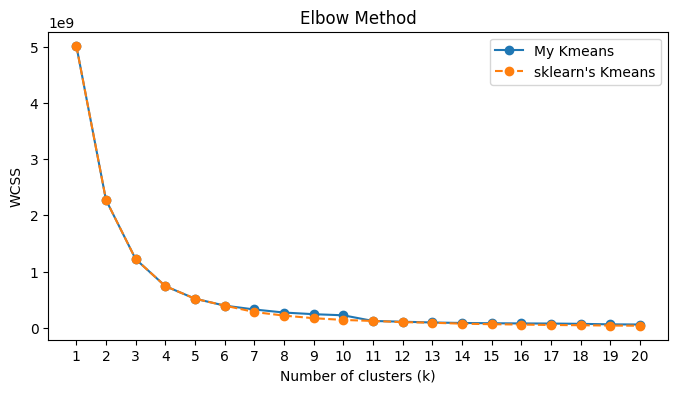

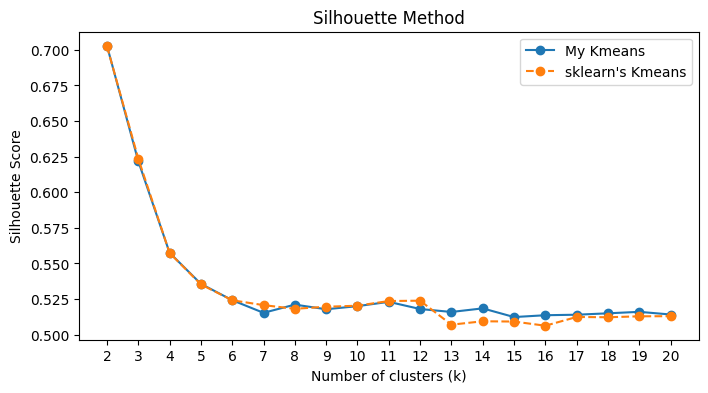

In [5]:
#TODO
from sklearn.cluster import KMeans as KMeans_sklearn

wcss_sk_learn = []
silhouette_scores_sk_learn = []
k_values = range(1, 21)
for k in k_values:
    kmeans = KMeans_sklearn(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_data)
    wcss_sk_learn.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores_sk_learn.append(silhouette_score(x_data, labels))


plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, marker='o', label='My Kmeans')
plt.plot(k_values, wcss_sk_learn, marker='o', label='sklearn\'s Kmeans', linestyle='--')
plt.xticks(k_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(k_values[1:], silhouette_scores, marker='o', label='My Kmeans')
plt.plot(k_values[1:], silhouette_scores_sk_learn, marker='o', label='sklearn\'s Kmeans', linestyle='--')
plt.xticks(k_values[1:])
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.legend()
plt.show()

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

### Answer:

In our plot, the elbow point appears to be around **k = 2**. This is where the WCSS shows a sharp decrease initially, and then the rate of decrease slows down noticeably after this point. Therefore, **k = 2** is a suitable choice for the number of clusters.

In our plot, the silhouette score is highest for **k = 2**. Therefore, **k = 2** is the most suitable choice for the number of clusters according to the Silhouette Method.

The Elbow Method and the Silhouette Method might suggest different values for $( k $) because they measure different aspects of clustering quality. The Elbow Method focuses on the reduction in within-cluster variance, while the Silhouette Method assesses the cohesion and separation of clusters. Therefore, one method might prioritize minimizing internal variance, while the other emphasizes well-separated, cohesive clusters.

### would you prefer elbow method for determining optimal cluster number or silhouette method?

### Answer:

The preference between the Elbow Method and the Silhouette Method depends on the specific context and goals of the clustering task:

- **Elbow Method**: Preferred when the goal is to minimize the within-cluster variance and you want a simple, intuitive way to find a balance between variance reduction and the number of clusters.
  
- **Silhouette Method**: Preferred when the focus is on obtaining well-defined, distinct clusters with good separation and cohesion.

In general, the Silhouette Method is often more robust as it provides a more comprehensive evaluation of cluster quality. However, using both methods together can provide a more well-rounded perspective on the optimal number of clusters.